## Import library

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import copy as cp
import calendar
from datetime import timedelta

In [2]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

In [3]:
def strtoint(s):
   #print(s)
    if type(s) != str :
        return s
    ss = s.split(',')
    #print(ss[0])
    temp = 0
    for i in range(len(ss)):
        temp = temp * 1000 + int(ss[i])
#     temp = float(temp / 1000000)
    return temp

## Build a library

In [4]:
transportCnt = dict()

In [5]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [6]:
for i in year:
    for j in month:
        if i == '2022' and j == '04':
            break
        dt_name = '+OÑ_¦¦¦BÑ¦¿t¦+«+¦B¦q¦+¡p_' + i + j+'.csv'
        df = pd.read_csv(dt_name,encoding='big5')
        for k in range(df.shape[0]):
            tmp = df['營運日'][k]
            if(tmp != tmp):
                continue
            tmp = df['營運日'][k].split('/')
            date = datetime(int(tmp[0]) + 1911, int(tmp[1]), int(tmp[2]))
            transport = strtoint(df['總運量'][k])
            transportCnt.setdefault(date,transport)

## Functions

In [7]:
def getHoliday(year, Holiday, df):
    name = []
    y = year
    i = year - 2005
    if(type(df[Holiday][i]) == datetime):
        name.append(df[Holiday][i])
    else:
        start, end = df[Holiday][i].split('-')
        start = start.split('/')
        start = [int(s) for s in start]
        end = end.split('/')
        end = [int(s) for s in end]

        if(start[0] == end[0]):
            name += [datetime(y, start[0], x) for x in np.arange(start[1], end[1] + 1, 1)]
        else:
            lastday = calendar.monthrange(y, start[0])[1]
            if(start[0] == 12):
                name += [datetime(y - 1, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            else:
                name += [datetime(y, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            name += [datetime(y, end[0], x) for x in np.arange(1, end[1] + 1, 1)]
    return name

In [8]:
def getHolidayLength(date):
    holiday, column, i = isHoliday([date.year], h_columns, date)
    if(holiday):
        return df[column][i]
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 2
    else:
        return 0

In [9]:
def isHoliday(years, columns, date):
    for column in columns:
        for year in years:
            if(date in holiday_rec[column][year - 2005]):
                return True, column, year - 2005
    return False, -1, -1

In [10]:
def holiday_type(date):
    y = date.year
    m = date.month
    d = date.day
    traditional = ['春節', '端午', '中秋']
    national = ['雙十', '二二八', '元旦', '清明', '勞動']
    years = np.arange(2015, 2023, 1)
    if(isTyphoon(date) or ((m == 12) and (d == 31)) or isHoliday(years, ['除夕'], date)[0]):
        return
    elif(isHoliday(years, traditional, date)[0]):
        return 'Traditional'
    elif(isHoliday(years, national, date)[0]):
        return 'National'
    elif((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return 'Western'
#     elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
#         return 'Fother'
    elif(date.isoweekday() >= 5):
        return 'Weekend'
    else:
        return 'Weekday'

In [11]:
def FBE(holidays_to_check, date):
    years = np.arange(2015, 2020, 1)
    tom = date + timedelta(days = 1)
    
    if(tom == datetime(2015, 1, 2)):
        return (transportCnt[date] + transportCnt[datetime(2015, 1, 4)]) / 2
    
    ish, col, i = isHoliday(years, holidays_to_check, tom)
    if(ish):            
        length = getHolidayLength(tom)
        df_h = holiday_rec[col][i]
        firstday = df_h[0]
        zeroday = date
        lastday = df_h[len(df_h) - 1]
        if(firstday == tom):
#             if((zeroday.month == 12 and zeroday.day == 31)):
#                 return (transportCnt[firstday] + transportCnt[lastday]) / 2
#             elif((firstday.month == 12 and firstday.day == 31) or isHoliday(years, ['除夕'], firstday)[0]):
#                 return (transportCnt[zeroday] + transportCnt[lastday]) / 2
            return (transportCnt[zeroday] + transportCnt[firstday] + transportCnt[lastday]) / 3

    elif(new_holiday_type(date) == '假日'):
        if(date.isoweekday() == 5):
            return (transportCnt[date] + transportCnt[date + timedelta(days = 1)] + transportCnt[date +  timedelta(days = 2)]) / 3
#         elif(date.isoweekday() == 6):
#             return '2'
#         elif(date.isoweekday() == 7):
#             return '3'
    return float('nan')

In [12]:
def season(date):
    s = []
    start = 3
    for i in range( 4 ) : 
        s.append( [])
        for j in range( 3 ) :
            s[i].append( start ) 
            start = ( start % 12 ) + 1
    m = date.month
    if(m in s[0]):
        return 'Spring'
    elif(m in s[1]):
        return 'Summer'
    elif(m in s[2]):
        return 'Fall'
    else:
        return 'Winter'

In [13]:
def new_holiday_type(date):
    holidays = [['春節'],['端午'],['中秋'], ['雙十'],['二二八'],['元旦'],['清明']]
    y = date.year
    m = date.month
    d = date.day
    years = np.arange(2015, 2023, 1)
    if(((m == 12) and (d == 31))):
        return '跨年'
    if(isTyphoon(date)):
        return
    for i, h in enumerate(holidays):
        if(isHoliday(years, h, date)[0]):
            return h[0]
    if((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return '西洋'
    elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
        return 'Fother'
    if(date.isoweekday() >= 5):
        return '假日'
    return '平日'


In [14]:
def isTyphoon(date):
    if(date in list(df_typhoon['日期'])):
        return True
    return False

## Global

In [15]:
df = pd.read_excel('../歷年連假天數.xlsx')
df = df.drop(index = 18)
df_typhoon = pd.read_excel('../Typhoon_date.xlsx')
columns = ['春節.1', '端午.1', '中秋.1', '雙十.1', '二二八.1', '元旦.1', '清明.1', '勞動.1']
years = np.arange(2005, 2023, 1)
holiday_rec = []
for column in columns:
    tmp = []
    for year in years:
        tmp.append(getHoliday(year, column, df))
    holiday_rec.append(tmp)
holiday_rec = pd.DataFrame(holiday_rec).T
h_columns = ['春節', '端午', '中秋', '雙十', '二二八', '元旦', '清明', '勞動']
holiday_rec.columns = h_columns

------

In [16]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Year'] = [day.year for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]
df2['Day'] = [day.isoweekday() for day in df2['Date']]
df2['Holiday_Type'] = [new_holiday_type(day) for day in df2['Date']]
df2['Typhoon'] = [isTyphoon(day) for day in df2['Date']]
# df2 = df2.drop(df2[df2['Holiday_Type'] == '除夕'].index)
# df2 = df2.drop(df2[df2['Holiday_Type'] == '跨年'].index)
df2 = df2.drop(df2[df2['Typhoon'] == True].index)
df2 = df2.drop(df2[df2['Year'] >= 2020].index)
df2.head(75)

,Date,TPcnt,Year,Month,Day,Holiday_Type,Typhoon
0,2015-01-01,1796950,2015,1,4,元旦,False
1,2015-01-02,1830184,2015,1,5,元旦,False
2,2015-01-03,1802037,2015,1,6,元旦,False
3,2015-01-04,1585463,2015,1,7,元旦,False
4,2015-01-05,1915326,2015,1,1,平日,False
...,...,...,...,...,...,...,...
70,2015-03-12,2089203,2015,3,4,平日,False
71,2015-03-13,2277913,2015,3,5,假日,False
72,2015-03-14,2130819,2015,3,6,假日,False
73,2015-03-15,1752420,2015,3,7,假日,False


In [17]:
df2[df2['Date'] == datetime(2015, 9, 26)]

,Date,TPcnt,Year,Month,Day,Holiday_Type,Typhoon
268,2015-09-26,1703801,2015,9,6,中秋,False


In [18]:
isHoliday(np.arange(2015, 2020, 1), h_columns, datetime(2015, 12, 25))
datetime(2015, 12, 25).isoweekday()

5

In [19]:
days_len = [[]for i in range(4)]

In [20]:
year = np.arange(2015, 2020, 1)
month = np.arange(1, 13, 1)
for y in year:
    for m in month:
        for d in np.arange(1, calendar.monthrange(y,m)[1] + 1, 1):
            today = datetime(y,m,d)
            tpcnt = FBE(h_columns, today)
            length = getHolidayLength(today + timedelta(days = 1))
            if(type(length) == datetime):
                length = getHolidayLength(today + timedelta(days = 2))
            else:
                length = int(length)
            if(tpcnt == tpcnt):
                if(length > 4):
#                     print(f"{today}:{tpcnt:.1f}:{length}")
                    days_len[3].append(tpcnt)
                elif(length >= 2):
#                     print(f"{today}:{tpcnt:.1f}:{length}")
                    days_len[length - 2].append(tpcnt)

In [21]:
getHolidayLength(datetime(2015, 2, 17) + timedelta(days = 1))

6.0

In [22]:
# isHoliday(np.arange(2015, 2020, 1), h_columns, datetime(2019, 6, 7))
datetime(2018, 1, 1).isoweekday()

1

In [23]:
df1 = pd.DataFrame(days_len).T
columns = ['Two', 'Three', 'Four', 'FourPlus']
df1.columns = columns
df1

,Two,Three,Four,FourPlus
0,1.870752e+06,1.966612e+06,1.691206e+06,1.363860e+06
1,1.909664e+06,1.942917e+06,1.835914e+06,1.652727e+06
2,1.880122e+06,1.688873e+06,1.889519e+06,1.419794e+06
3,1.924408e+06,1.554259e+06,1.711812e+06,1.471616e+06
4,1.955889e+06,1.837351e+06,1.610087e+06,1.844403e+06
...,...,...,...,...
215,2.270592e+06,NaN,NaN,NaN
216,2.304859e+06,NaN,NaN,NaN
217,2.446434e+06,NaN,NaN,NaN
218,2.324727e+06,NaN,NaN,NaN


In [24]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df1b = df1.rename(columns={"Two": "TPcnt_two", "Three": "TPcnt_three"
                         , "Four": "TPcnt_four", "FourPlus": "TPcnt_fourplus"})
df1b = df1.copy()
# df1b
df1b.columns = ["TPcnt_" + str(column) for column in columns]
# 需要一個ID欄位
df1b["id"] = df1b.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df2 = pd.wide_to_long(df1b, ["TPcnt"], sep="_", suffix='\w+', i="id", j="Holiday_Type").dropna().reset_index()
print("Head of dataset:")
display(df2.head())
print("Tail of dataset:")
display(df2.tail())
# df2 = df2.drop(df2[df2['Holiday_Type'] == 'FourPlus'].index)

Head of dataset:


,id,Holiday_Type,TPcnt
0,0,Two,1.870752e+06
1,1,Two,1.909664e+06
2,2,Two,1.880122e+06
3,3,Two,1.924408e+06
4,4,Two,1.955889e+06


Tail of dataset:


,id,Holiday_Type,TPcnt
246,1,FourPlus,1.652727e+06
247,2,FourPlus,1.419794e+06
248,3,FourPlus,1.471616e+06
249,4,FourPlus,1.844403e+06
250,5,FourPlus,1.828618e+06


In [25]:
results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()
# results.summary()
aov = sms.anova_lm(results, typ=2)
aov

,sum_sq,df,F,PR(>F)
C(Holiday_Type),1.826399e+12,3.0,43.190825,1.786481e-22
Residual,3.481608e+12,247.0,NaN,NaN


In [26]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9787, p=0.0008


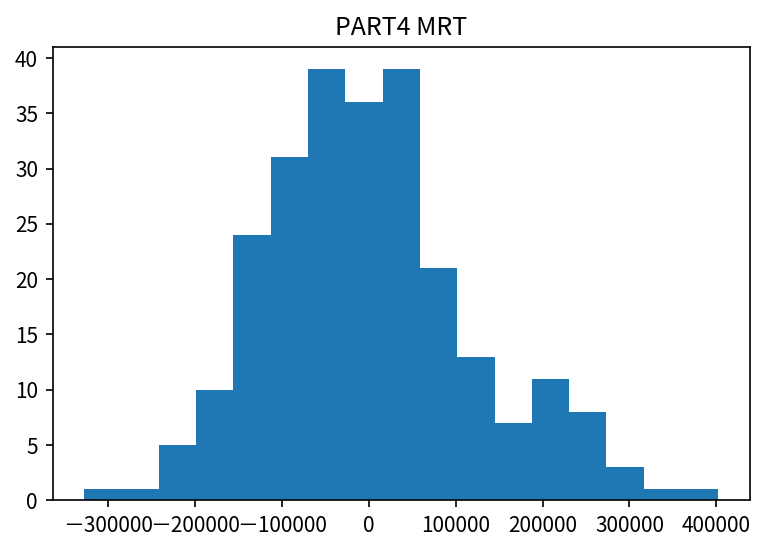

In [27]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

_ = plt.hist(results.resid, bins = "auto")
plt.title('PART4 MRT')
plt.savefig( 'images/MRT_PART4_ANOVA_hist.jpg' )
plt.show()

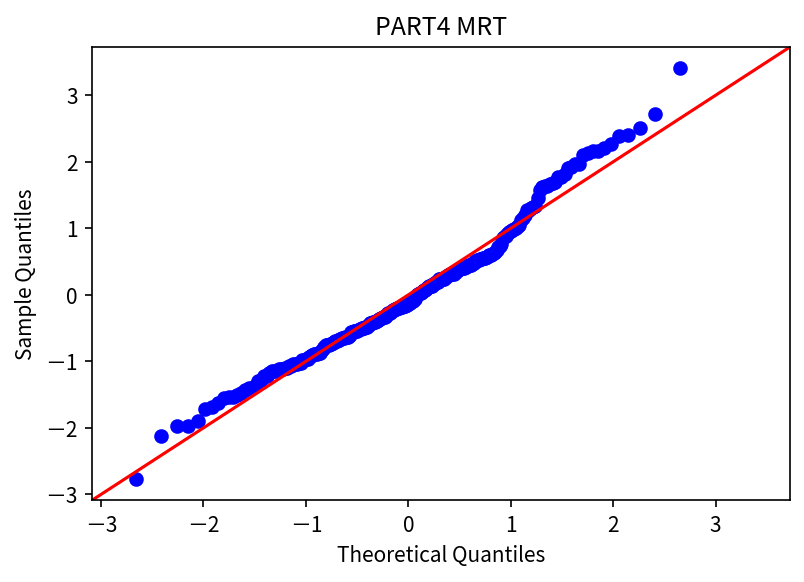

In [28]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.title('PART4 MRT')
plt.ylabel('Sample Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.savefig( 'images/MRT_PART4_ANOVA_qqplot.jpg')
plt.show()

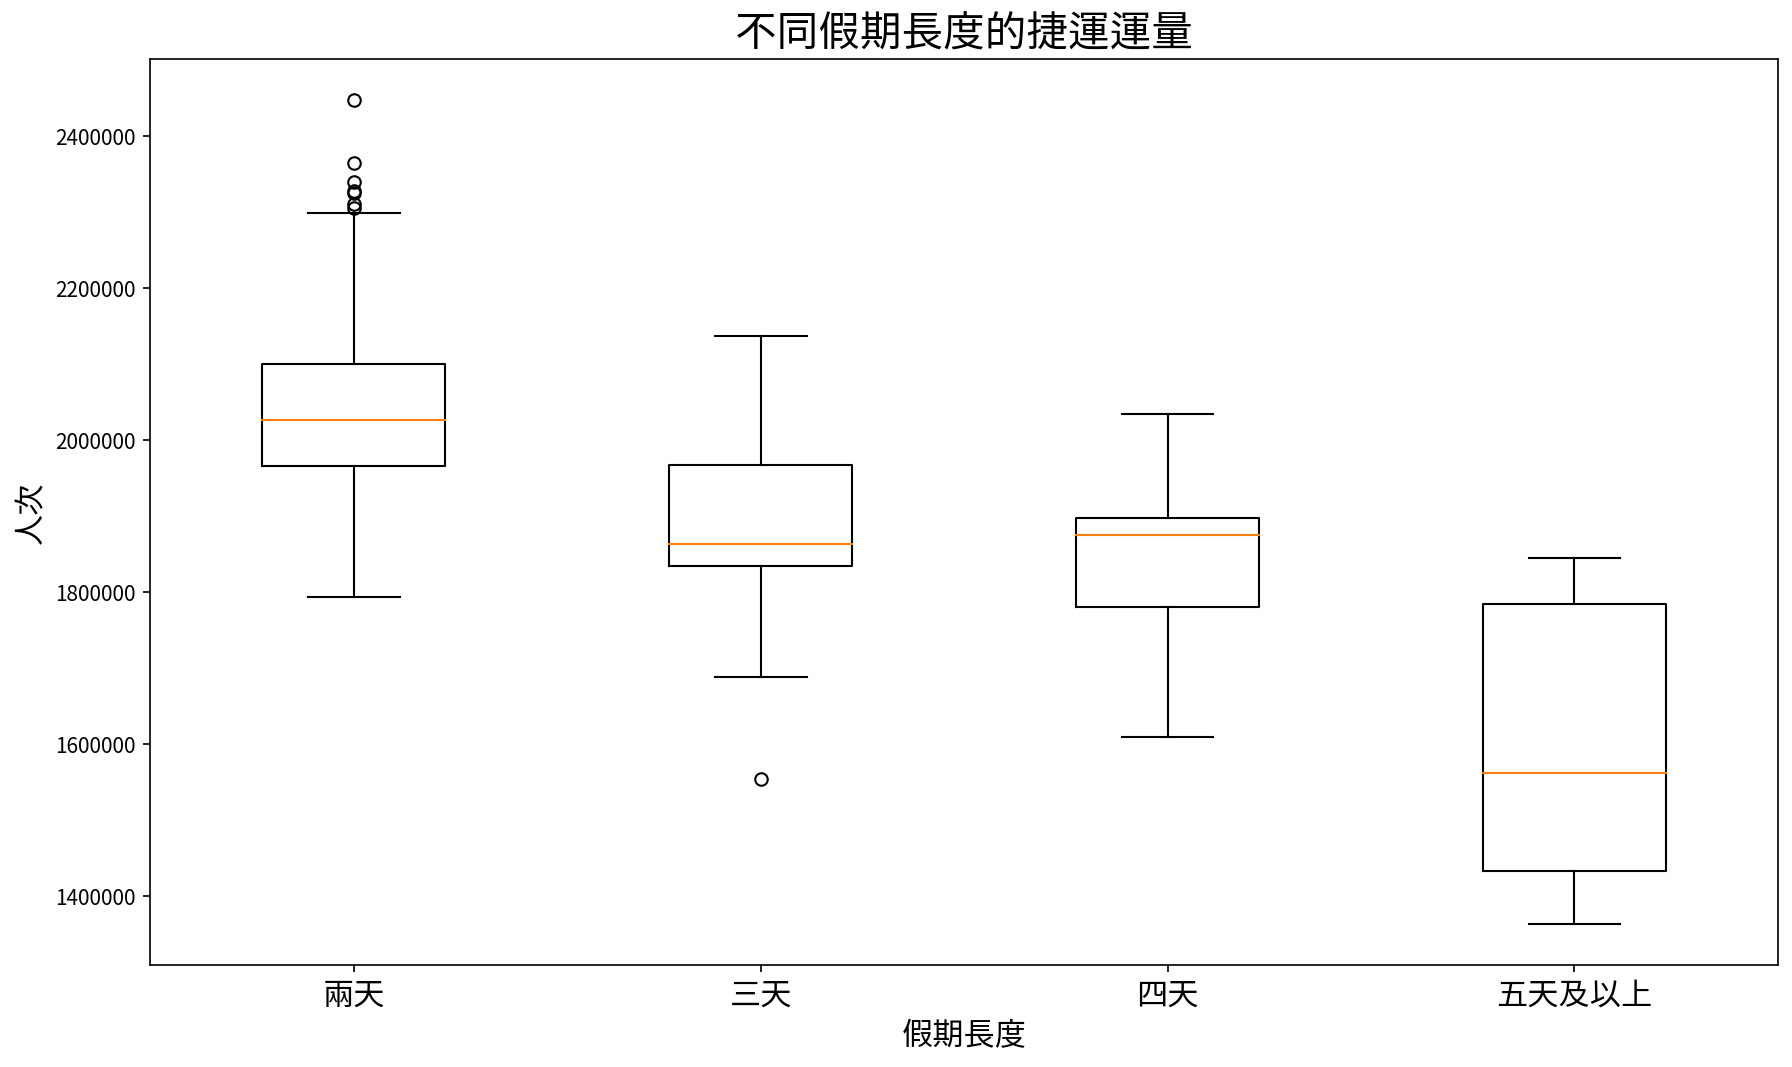

In [29]:
fig, ax = plt.subplots( figsize = ( 14, 8 ) )
plt.boxplot( days_len )
plt.xticks( range( 1, 5 ), ['兩天', '三天', '四天', '五天及以上'], fontsize = 15 )
plt.title( '不同假期長度的捷運運量', fontsize = 20 )
plt.xlabel( '假期長度', fontsize = 15 )
plt.ylabel( '人次', fontsize = 15 ) 
ax.ticklabel_format(style='sci', scilimits=(-1,100), axis='y')
plt.savefig( 'images/MRT_PART4_compare.jpg' )
plt.show()

In [30]:
mc = smm.MultiComparison(df2['TPcnt'], df2['Holiday_Type'])
print(mc.tukeyhsd().summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1   group2    meandiff  p-adj     lower        upper    reject
--------------------------------------------------------------------
    Four FourPlus -245811.625  0.001 -399365.6364 -92257.6136   True
    Four    Three  38468.9519 0.8311  -84472.6498 161410.5537  False
    Four      Two 201568.9841  0.001  110528.7867 292609.1815   True
FourPlus    Three 284280.5769  0.001  132707.9906 435853.1632   True
FourPlus      Two 447380.6091  0.001  320306.1072 574455.1109   True
   Three      Two 163100.0322  0.001   75443.1325 250756.9318   True
--------------------------------------------------------------------


D:\New folder\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


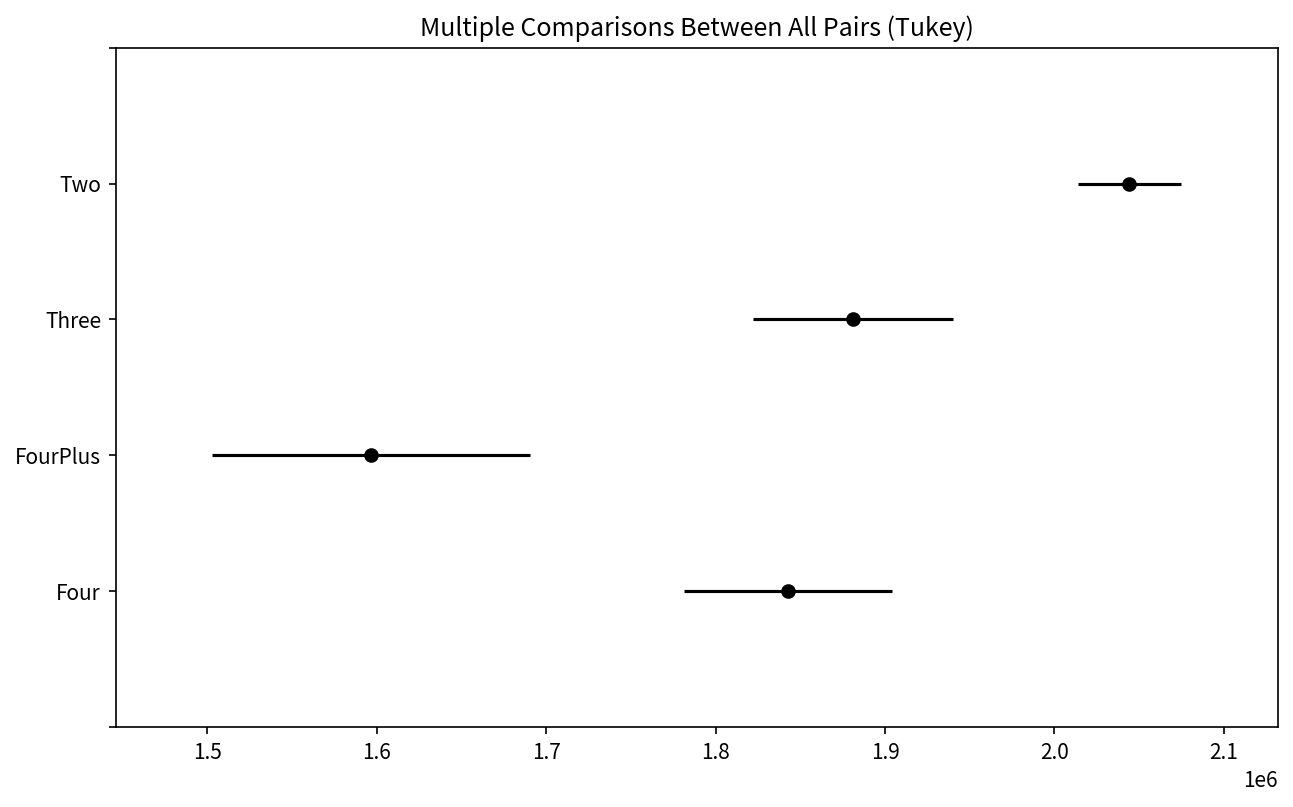

In [31]:
_ = mc.tukeyhsd().plot_simultaneous()

In [32]:
import statsmodels.stats.outliers_influence as sso
st1, data1, ss3 = sso.summary_table(results, alpha=0.05)
SD = data1[:, 10]
df1_c = pd.DataFrame([(SD), df2['TPcnt']]).T
df1_c.columns = ['SD', 'TPcnt']
filte = ((df1_c['SD'] < -2) | (df1_c['SD'] > 2))
print("Outliers by SD = \n")
display(df1_c[filte].reset_index(drop = True))
d = df1_c[filte].reset_index(drop = True)

Outliers by SD = 



,SD,TPcnt
0,2.146241,2.298449e+06
1,2.701139,2.364180e+06
2,-2.113774,1.793831e+06
3,2.390388,2.327370e+06
4,2.489725,2.339137e+06
5,2.116603,2.294939e+06
6,2.249068,2.310630e+06
7,2.200351,2.304859e+06
8,3.395534,2.446434e+06
9,2.368081,2.324727e+06


In [33]:
alldata = np.array([])
for day in days_len:
    alldata = np.concatenate([alldata, day])
alldata.sort()
tmpdf = pd.DataFrame(({'value': alldata}))
tmpdf['rank'] = tmpdf.index + 1
value2rank = tmpdf.groupby('value').mean().reset_index()
value2rank

,value,rank
0,1.363860e+06,1
1,1.419794e+06,2
2,1.471616e+06,3
3,1.554259e+06,4
4,1.610087e+06,5
...,...,...
246,2.324727e+06,247
247,2.327370e+06,248
248,2.339137e+06,249
249,2.364180e+06,250


In [34]:
T = []
for i, day in enumerate(days_len):
    samp = pd.DataFrame({'value': day})
    samp = pd.merge(samp, value2rank)
    T.append(samp['rank'].sum())
    print(f"T%s = {T[i]}"%(i))

T0 = 30344
T1 = 775
T2 = 463
T3 = 44


In [35]:
n = []
columns = ['Two', 'Three', 'Four', 'FourPlus']
for column in columns:
    n.append(df1[column].dropna().shape[0])
# print(n)
T = np.array(T)
n = np.array(n)
x = T ** 2 / n
k = 4
n = n.sum()
H = 12 / (n * (n + 1)) * (x.sum()) - 3 * (n + 1)
pvalue = 1 - stats.chi2.cdf(H, k - 1)

print(f"H = {H}")
print(f"p-value = {pvalue:.4f}")

H = 50.23294189210526
p-value = 0.0000


In [39]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Year'] = [day.year for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]
df2['Day'] = [day.isoweekday() for day in df2['Date']]
df2['Holiday_Type'] = [new_holiday_type(day) for day in df2['Date']]
df2['Typhoon'] = [isTyphoon(day) for day in df2['Date']]
# df2 = df2.drop(df2[df2['Holiday_Type'] == '除夕'].index)
# df2 = df2.drop(df2[df2['Holiday_Type'] == '跨年'].index)
df2 = df2.drop(df2[df2['Typhoon'] == True].index)
df2 = df2.drop(df2[df2['Year'] >= 2020].index)
df2['Length'] = [getHolidayLength(day) for day in df2['Date']]

In [42]:
df2[df2['Length'] == 4]

,Date,TPcnt,Year,Month,Day,Holiday_Type,Typhoon,Length
0,2015-01-01,1796950,2015,1,4,元旦,False,4.0
1,2015-01-02,1830184,2015,1,5,元旦,False,4.0
2,2015-01-03,1802037,2015,1,6,元旦,False,4.0
3,2015-01-04,1585463,2015,1,7,元旦,False,4.0
92,2015-04-03,1769724,2015,4,5,清明,False,4.0
93,2015-04-04,1674820,2015,4,6,清明,False,4.0
94,2015-04-05,1510349,2015,4,7,清明,False,4.0
95,2015-04-06,1579297,2015,4,1,清明,False,4.0
457,2016-04-02,1831245,2016,4,6,清明,False,4.0
458,2016-04-03,1655160,2016,4,7,清明,False,4.0
